### Convolution Neural Network for MNIST dataset

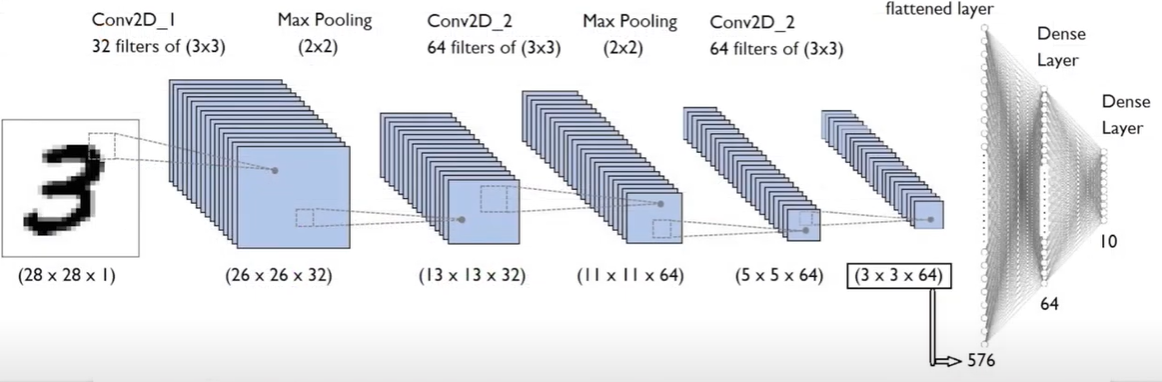

In [2]:
# CNN is better than dense network for image classification because it can capture the spatial information of the image.
# For example, number 3 has a round shape, number 4 has a straight line, etc.

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = train_images.reshape((60000, 28, 28, 1)) # 1 is the number of channels, 3 for RGB, 1 for grayscale
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))  # 1 is the number of channels, 3 for RGB, 1 for grayscale
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))) # 32 filters, 3x3 kernel, 26x26x32 output because of the border
# if padding='same', the output will be 28x28x32
model.add(layers.MaxPooling2D((2,2))) # 13x13x32 output, max pooling: max value of 2x2 block to 1 value
model.add(layers.Conv2D(64, (3,3), activation='relu')) # 11x11x64 output
model.add(layers.MaxPooling2D((2,2))) # 5x5x64 output
model.add(layers.Conv2D(64, (3,3), activation='relu')) # 3x3x64 output
model.add(layers.Flatten()) # 576 output
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

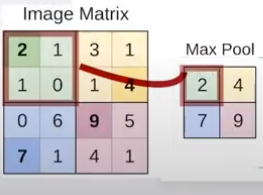

In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 26s 27ms/step - loss: 0.1870 - accuracy: 0.9416
Epoch 2/5
938/938 [==============================] - 29s 30ms/step - loss: 0.0482 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 34s 37ms/step - loss: 0.0333 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0256 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0204 - accuracy: 0.9937


In [9]:
model.evaluate(test_images, test_labels)[1]

313/313 [==============================] - 2s 5ms/step - loss: 0.0274 - accuracy: 0.9915


0.9915000200271606